**$\underline{Radioactive\hspace{0.2cm} Decay}$**

Here, this program was made to simulate a radioactive decay of Mo-99 (molybdenum) (used in medical physics/nuclear medicine, also used as a radioactive tracer in medical imaging procedures such as SPECT scans). When it begin to decay(ou as it decays), Tc-99m (technetium) is formed, which begins to decay as well (after spent some time).

--> The rate evolution of radioactive quantities/quantities of Mo-99 nucleus (radioisotopes of molybdenum-99): $\frac{dn_1}{dt}=-\lambda_1n_1$ with a half life of 66 hours ($\tau_1 = 66$h, time for material to lose half of its nucleus (radionuclides (un))).

--> The rate evolution of radioactive material Tc-99m (technetium-99m): $\frac{dn_2}{dt} = \lambda_1n_1-\lambda_2n_2$ with a half life of 6 hours ($\tau_2 = 6$h).

--> Using a time interval $\Delta t$ arbitrarily as 1, during 0 to $5\tau_1$.

--> Explicit Euler's method $y(t + \Delta t) = y(t) + y'(t)\Delta t$, substituting the material data, we have the following equations:

**-- For Mo-99:**

*    Numerical solution: $n_1(t + \Delta t) = n_1(t) - \lambda_1n_1(t)\Delta t$ or $n_1(t + \Delta t) = n_1(t)[1 - \lambda_1\Delta t]$

*    Analytical solution: $n_1(t) = n_{1_0}e^{-\lambda_1 t}$ 

Calculating the decay constant of the radionuclide ($\lambda$):

Considering $n(\tau) = \frac{1}{2}n_0$;

$n(t) = n_0e^{-\lambda t} → 0.5n_0 = n_0e^{-\lambda \tau} → 0.5\frac{n_0}{n_0} = e^{-\lambda \tau} → 0.5 = e^{-\lambda \tau} →ln|0.5| = ln|e^{-\lambda \tau}|→ ln(0.5) = -\lambda \tau → \lambda  = \frac{-ln(0.5)}{\tau} = \frac{ln(2)}{\tau}$

**-- For Tc-99m:**

*    Numerical solution: $n_2(t + \Delta t) = n_2(t) + (\lambda_1n_1(t)-\lambda_2n_2(t))\Delta t$ or $n_2(t + \Delta t) = \lambda_1n_1(t)\Delta t + n_2(t)(1-\lambda_2\Delta t)$

*    Analytical solution: $n_2(t) = \frac{n_{1_0}\lambda_1}{\lambda_2 - \lambda_1}(e^{-\lambda_1 t} - e^{-\lambda_2 t})$

--***Para o Tc99m:***

*   A solução numérica é: $n_2(t+\Delta t) = n_2(t) + (\lambda_1n_1(t)-\lambda_2n_2(t))\Delta t$ 
ou 
$n_2(t+\Delta t) =\lambda_1n_1(t)\Delta t + n_2(t)(1 -\lambda_2\Delta t)$

*    A solução analítica é: $n_2(t) = \frac{n_{1_0}\lambda_1}{\lambda_2 - \lambda_1}(e^{-\lambda_1 t}-e^{-\lambda_2 t})$

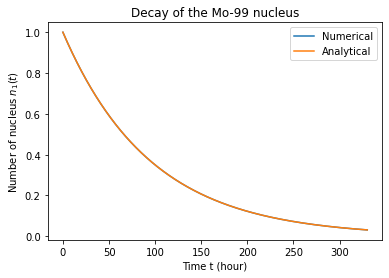

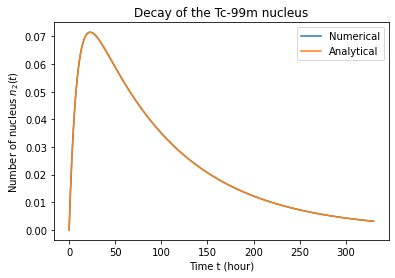

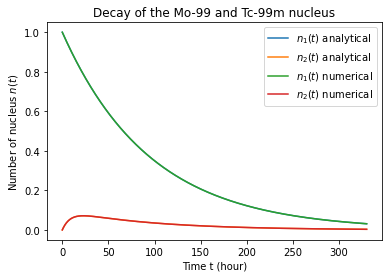

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial Conditions:
T1,T2 = 66,6 # tau, half life time.
dt = 0.005 # Distance of the steps that will be calculated.
n1n = 1 # Numerical n1, with its unit value.
n1a,n10,lam1 = n1n,n1n,np.log(2)/T1 # Analytical n1, initial n1, lambda of n1 (rate of decay) = lam = ln(2)/t = 0,0105...
n2n,n2a,lam2 = 0,0,np.log(2)/T2 # Numerical n2, analytical n2, lambda n2 = 0,1155...
t = 0 # Initial time of the loop.
tf = 5 * T1 # Final time of the loop.


# Lists:
list_n1n = [n1n] 
list_n1a = [n1a] 
list_n2n = [n2n] 
list_n2a = [n2a] 
list_t = [t] 


while t < tf: # loop that will calculate the points from 0 to 5*t1(= 330).
  # For Mo-99:
  n1a = n10 * np.exp(-lam1 * t) # Analytical solution of N1(t).
  list_n1a.append(n1a)
  
  n1n = n1n * (1 - lam1 * dt) # Numerical solution of N1(t) with Explicit Euler's method.
  list_n1n.append(n1n)

  # For Tc-99m:  
  n2a = ((n10 * lam1)/(lam2 - lam1)) * (np.exp(-lam1 * t) - np.exp(-lam2 * t)) # Analytical solution of N2(t).
  list_n2a.append(n2a)

  n2n = n2n + (lam1 * n1n - lam2 * n2n) * dt  # Numerical solution of N2(t) with explicit Euler's method.
  list_n2n.append(n2n)
  
  t = t + dt # Number of "steps" that increases according to the width of dt. 
  list_t.append(t)


#  Graphs:
# 1) Graph of numerical n1 and analytical n1:
plt.plot(list_t,list_n1n) 
plt.plot(list_t,list_n1a)
plt.title('Decay of the Mo-99 nucleus')
plt.legend(['Numerical','Analytical']) 
plt.xlabel('Time t (hour)')
plt.ylabel('Number of nucleus $n_1(t)$')
plt.show()

# 2) Graph of numerical n2 and analytical n2:
plt.plot(list_t,list_n2n) 
plt.plot(list_t,list_n2a)
plt.title('Decay of the Tc-99m nucleus')
plt.legend(['Numerical','Analytical'])
plt.xlabel('Time t (hour)')
plt.ylabel('Number of nucleus $n_2(t)$')
plt.show()

# Graph with all the data, n1 (numerical and analytical) and n2 (numerical and analytical):
plt.plot(list_t,list_n1a)
plt.plot(list_t,list_n2a)
plt.plot(list_t,list_n1n)
plt.plot(list_t,list_n2n)
plt.title('Decay of the Mo-99 and Tc-99m nucleus')
plt.legend(['$n_1(t)$ analytical','$n_2(t)$ analytical','$n_1(t)$ numerical','$n_2(t)$ numerical'])
plt.xlabel('Time t (hour)')
plt.ylabel('Number of nucleus $n(t)$')
plt.show()





Repeating the same last figure, but multiplying $n_2$ by 10 (just to make it easer to visualize graphically) and finding the maximum point before it decays (finding the time when this happens. This is the time that reactors must take into account to produce Tc-99m and analyze, because after that, begins to decrease quickly).

The maximum value of Tc-99m (technetium-99m) measured by numerical method is: 0.7152787456229786
The maximum value of Tc-99m (technetium-99m) measured by analytical method is: 0.7152667634391534
A difference of 1.1982183825143267e-05


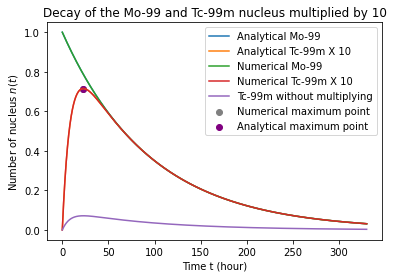

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Initial Conditions:
T1,T2 = 66,6 # tau, half life time.
dt = 0.005 # Distance of the steps that will be calculated.
n1n = 1 # Numerical n1, with its unit value.
n1a,n10,lam1 = n1n,n1n,np.log(2)/T1 # Analytical n1, initial n1, lambda of n1 (rate of decay) = lam = ln(2)/t = 0,0105...
n2n,n2a,lam2 = 0,0,np.log(2)/T2 # Numerical n2, analytical n2, lambda n2 = 0,1155...
t = 0 # Initial time of the loop.
tf = 5 * T1 # Final time of the loop.
n2b = n2a # Tc-99m variable without multiplying by 10. 


# Lists:
list_n1n = [n1n] 
list_n1a = [n1a] 
list_n2n = [n2n] 
list_n2a = [n2a] 
list_t = [t]
list_n2b = [n2b]


while t < tf: # loop that will calculate the points from 0 to 5*t1(= 330).
# For Mo-99:
  n1a = n10 * np.exp(-lam1 * t) # Analytical solution of N1(t).
  list_n1a.append(n1a)
  
  n1n = n1n * (1 - lam1 * dt) # Numerical solution of N1(t) with Explicit Euler's method.
  list_n1n.append(n1n)

# For Tc-99m:  
  n2a = ((n10 * lam1)/(lam2 - lam1)) * (np.exp(-lam1 * t) - np.exp(-lam2 * t)) # Analytical solution of N2(t).
  list_n2a.append(n2a * 10)

  n2b =  n2b + (lam1 * n1n - lam2 * n2b) * dt # N2(t) without multiplying by 10.  
  list_n2b.append(n2b)

  n2n = n2n + (lam1 * n1n - lam2 * n2n) * dt  # Numerical solution of N2(t) with explicit Euler's method.
  list_n2n.append(n2n * 10)
  
  t = t + dt # Number of "steps" that increases according to the width of dt. 
  list_t.append(t)


# Maximum point of nm (numerical maximum) and am (analytical maximum).
nm = max(list_n2n)
#index = list_n2a.index(m)
print('The maximum value of Tc-99m (technetium-99m) measured by numerical method is:', nm)

am = max(list_n2a)
print('The maximum value of Tc-99m (technetium-99m) measured by analytical method is:', am)

d = nm - am
print('A difference of', d)


# Graph with all the data, n1 (numerical and analytical) and n2 (numerical and analytical):
plt.plot(list_t,list_n1a)
plt.plot(list_t,list_n2a)
plt.plot(list_t,list_n1n)
plt.plot(list_t,list_n2n)
plt.plot(list_t,list_n2b)
plt.scatter((list_n2n.index(max(list_n2n)))/(1/dt),max(list_n2n),color = 'grey')
plt.scatter((list_n2a.index(max(list_n2a)))/(1/dt),max(list_n2a),color = 'purple')
plt.title('Decay of the Mo-99 and Tc-99m nucleus multiplied by 10')
plt.legend(['Analytical Mo-99','Analytical Tc-99m X 10','Numerical Mo-99','Numerical Tc-99m X 10','Tc-99m without multiplying','Numerical maximum point','Analytical maximum point'])
plt.xlabel('Time t (hour)')
plt.ylabel('Number of nucleus $n(t)$')
plt.show()

[Link for radioactive decay law (in Brazilian portuguese)](https://edisciplinas.usp.br/pluginfile.php/5235900/mod_resource/content/1/lei-decaimento.pdf) 